# Exercise 03 - Autoregressive Integrated Moving Average Models

- The result will be evaluated from a report in Jupiter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: 22, 2020, 11:59 pm, through Sicua + (Upload repository link)

# 03.1 - Plot the ACF and PACF of the 4 series in data_arma.csv
### Try to say to which AR or MA process each series belong

In [8]:
series_2 = pd.read_csv('data_arma.csv', header=0, index_col=0, squeeze=True)

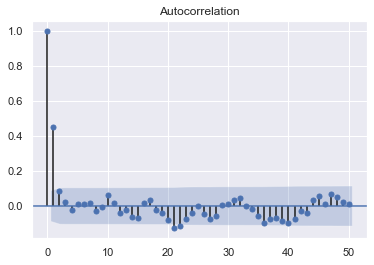

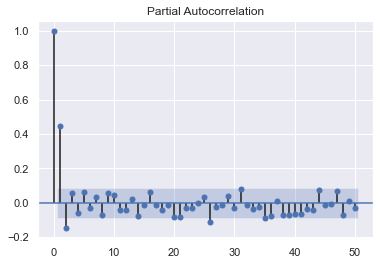

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(series_2['ts1'], lags=50);
plot_pacf(series_2['ts1'], lags=50);

# Media movil de orden 1

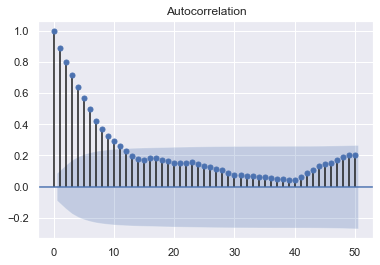

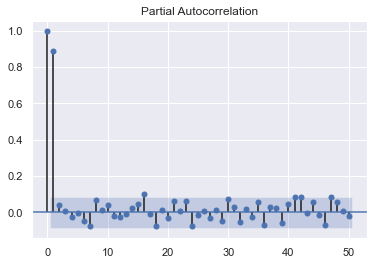

In [25]:
plot_acf(series_2['ts2'], lags=50);
plot_pacf(series_2['ts2'], lags=50);

# Autoregresivo de orden 1

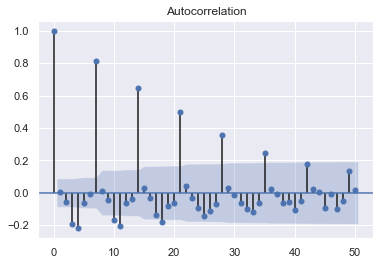

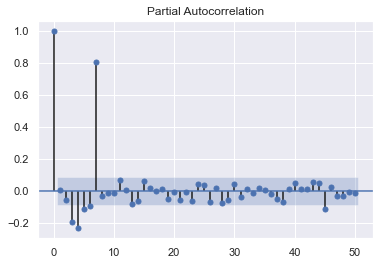

In [26]:
plot_acf(series_2['ts3'], lags=50);
plot_pacf(series_2['ts3'], lags=50);

# Autoregresivo de orden 7

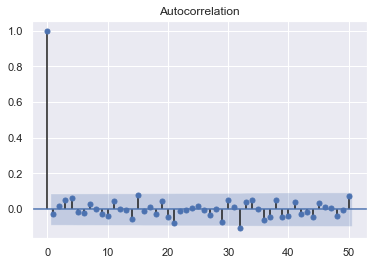

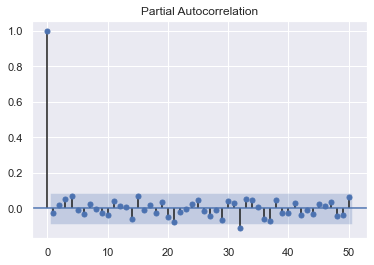

In [27]:
plot_acf(series_2['ts4'], lags=50);
plot_pacf(series_2['ts4'], lags=50);

# Proceso random - caminata aleatoria

# 03.2 - Using the shampoo dataset:
## Find the parameters p, d q that minimizes the mse of the rolling forecast


In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()


def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


In [193]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

df=pd.DataFrame(np.array([[0,1],[1,1],[2,1],[3,1],[4,1],[5,1]])
                  ,columns=['p', 'q'])

diccionario = { 'error' : [], 'p1' : [], 'q1' :[]}

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]


for i in range (len(df)):
    history = [x for x in train]
    predictions = list()
    p2 = df['p'].iloc[i]
    q2 = df['q'].iloc[i]
    for t in range(len(test)):
        model = ARIMA(history, order=(p2,1,q2))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    diccionario['error'].append (mean_squared_error(test, predictions))
    diccionario['p1'].append (p2)
    diccionario['q1'].append (q2)
       
valor = diccionario['error'].index(min(diccionario['error']))
print ('valor p es = '+str(diccionario['p1'][valor]) +" y el valor q es = " + str(diccionario['q1'][valor]))

C:\Users\jcoronelv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jcoronelv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jcoronelv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\jcoronelv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jcoronelv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model

valor p es = 4 y el valor q es = 1


C:\Users\jcoronelv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\jcoronelv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
